### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

### Official Documentation
- [DecisonTree](https://scikit-learn.org/stable/modules/tree.html)
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier)
- [load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

#### Loading the data

In [2]:
iris_data=load_iris(return_X_y=False,as_frame=True)
X=iris_data.data
y=iris_data.target
print("Features in the data are:",iris_data.feature_names)
print("The Target Names are:",iris_data.target_names)
print(iris_data.DESCR)

Features in the data are: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The Target Names are: ['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.7

### train_test_split

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (120, 4)
y_train: (120,)
X_test: (30, 4)
y_test: (30,)


In [4]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [5]:
# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.70      0.88      0.78         8
           2       0.86      0.67      0.75         9

    accuracy                           0.87        30
   macro avg       0.85      0.85      0.84        30
weighted avg       0.88      0.87      0.87        30




 Decision Tree Classification Report:

              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000  13.000000
1              0.700000  0.875000  0.777778   8.000000
2              0.857143  0.666667  0.750000   9.000000
accuracy       0.866667  0.866667  0.866667   0.866667
macro avg      0.852381  0.847222  0.842593  30.000000
weighted avg   0.877143  0.866667  0.865741  30.000000


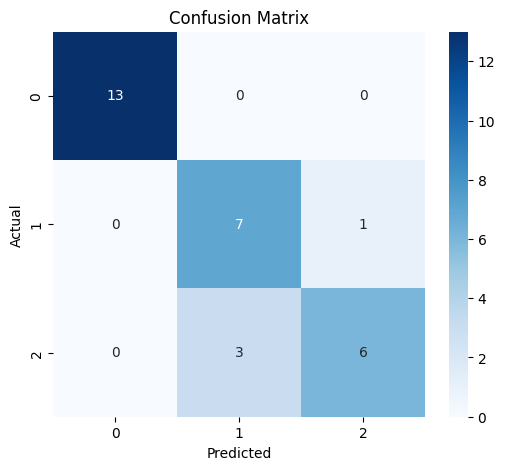

In [9]:
accuracy = accuracy_score(y_test, y_pred)

# Generate Classification Report
class_report = classification_report(y_test, y_pred, output_dict=True)

# Convert classification report to DataFrame for better visualization
report_df = pd.DataFrame(class_report).transpose()

# Display Report
print("\n Decision Tree Classification Report:\n")
print(report_df)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()